In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import numpy as np

%matplotlib inline
plt.style.use('ggplot')
sns.set(context="paper", font="monospace")

In [149]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [150]:
df.shape

(1338, 7)

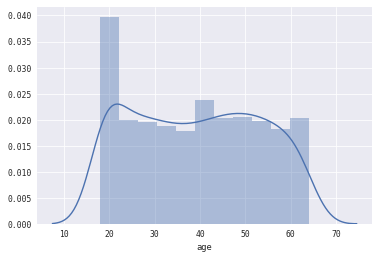

In [151]:
sns.distplot(df.age)

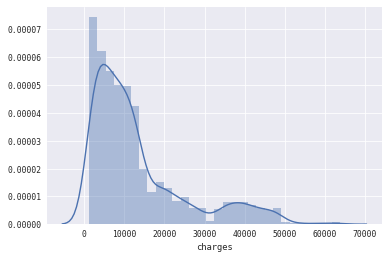

In [152]:
sns.distplot(df.charges)

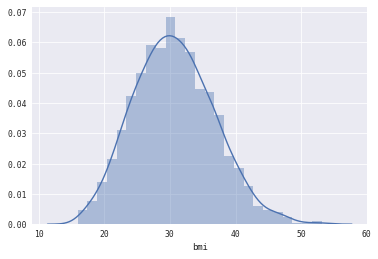

In [153]:
sns.distplot(df.bmi)

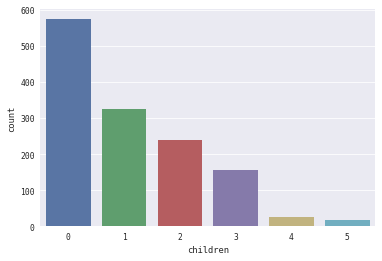

In [154]:
sns.countplot(df.children)

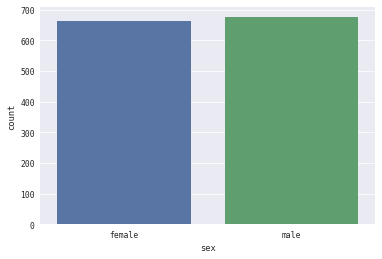

In [155]:
sns.countplot(df.sex)

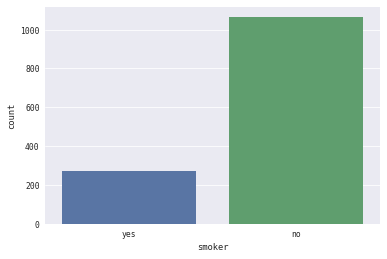

In [156]:
sns.countplot(df['smoker'])

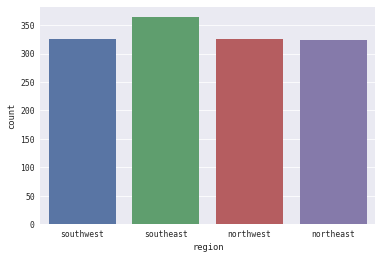

In [157]:
sns.countplot(df['region'])

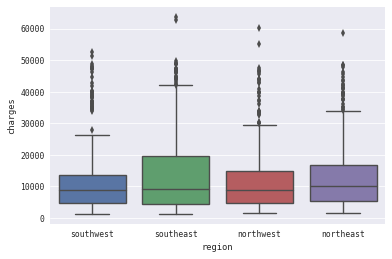

In [158]:
sns.boxplot(x = "region", y = "charges", data = df)

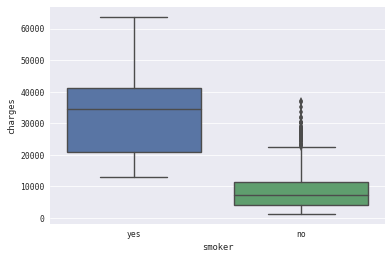

In [159]:
sns.boxplot(x = "smoker", y = "charges", data = df)

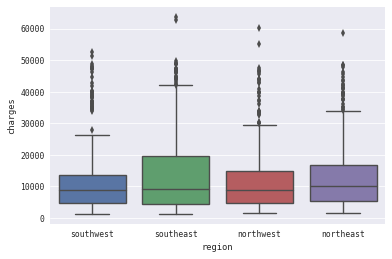

In [160]:
sns.boxplot(x = "region", y = "charges", data = df)

In [49]:
df.groupby(['smoker']).mean()['charges']

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [50]:
df.groupby(['children']).mean()['charges']

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

In [51]:
df.groupby(['region']).mean()['charges']

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

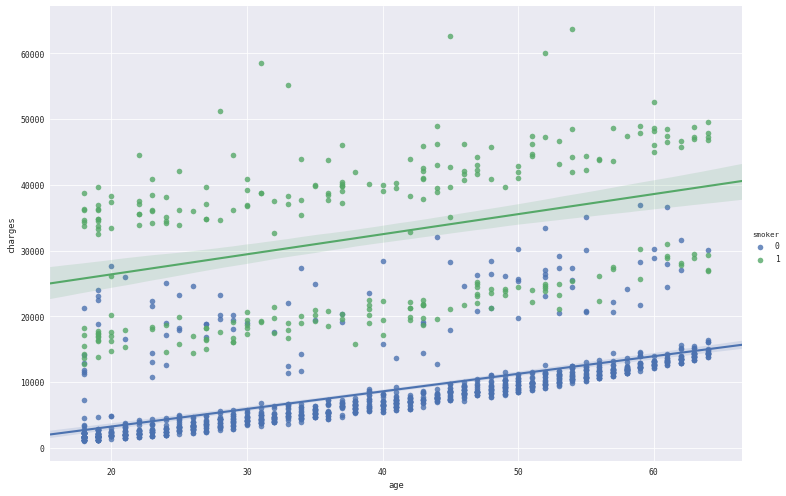

In [118]:
sns.lmplot('age','charges',data=df,size=7,hue='smoker',aspect=1.5)

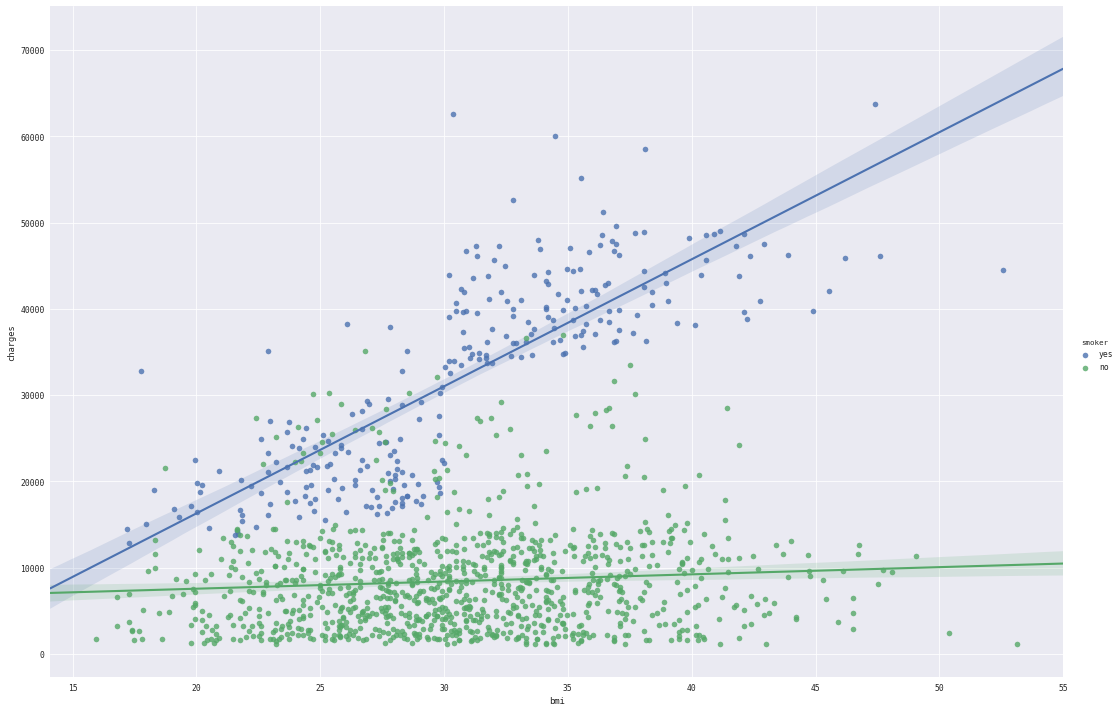

In [39]:
sns.lmplot('bmi', 'charges', data=df, size=10,hue='smoker',aspect=1.5);

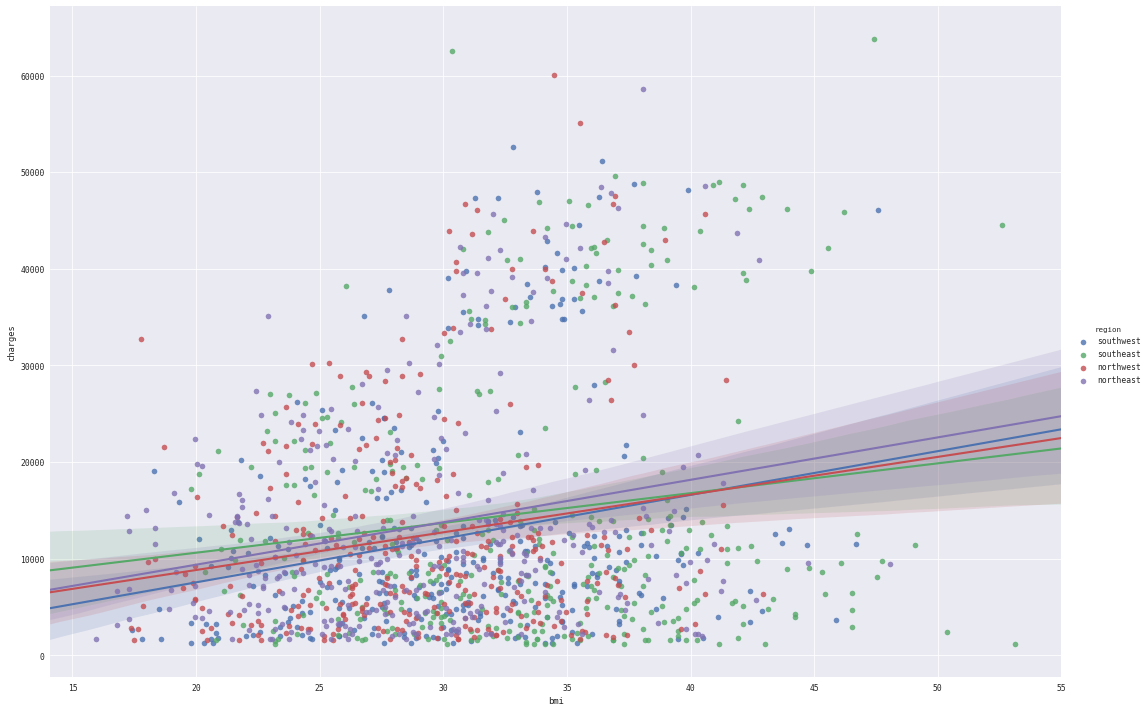

In [36]:
p = sns.lmplot('bmi', 'charges', data=df, size=10,hue='region',aspect=1.5)

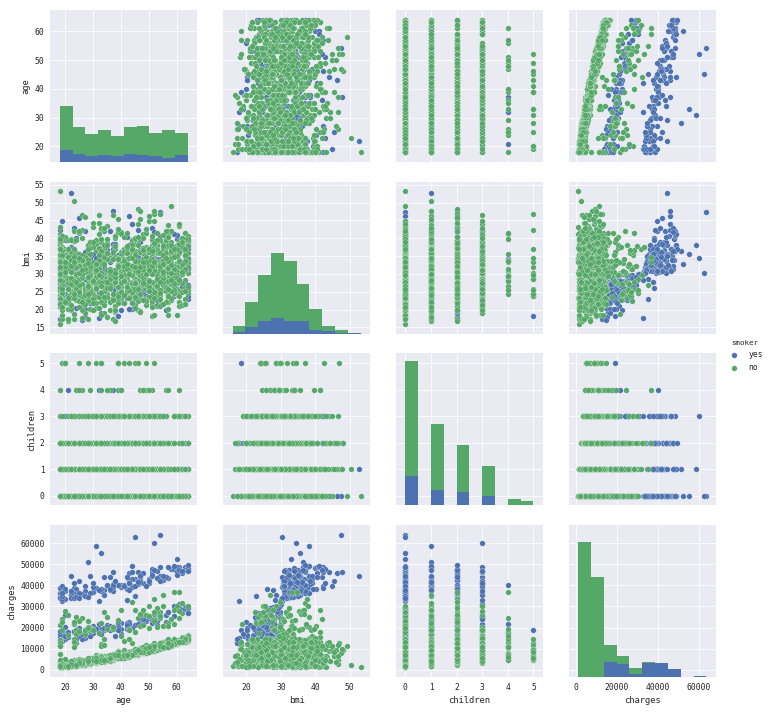

In [44]:
sns.pairplot(df,hue='smoker')

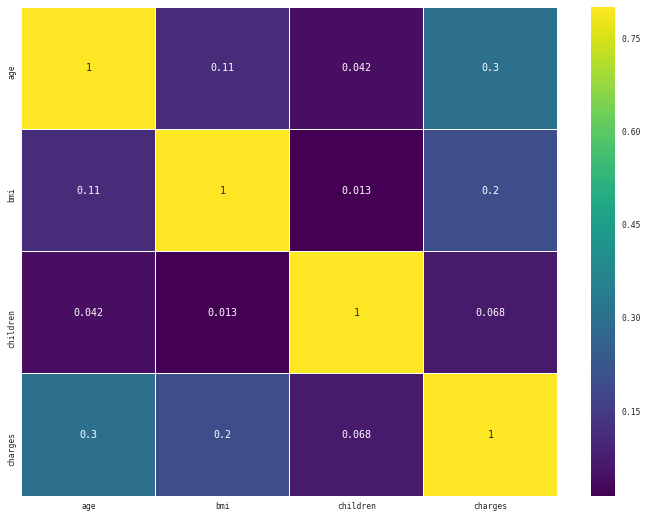

In [45]:
#Heat Map to see the correlation between diffrent variables
#Find the correlation between the different varaibles in the datasets
cormat = df.corr()

#Set uo the matplolib figure
f, ax = plt.subplots(figsize=(12, 9))

#Draw the heatmap using seaborn
colormap = plt.cm.viridis
sns.heatmap(cormat, linewidths=0.1, cmap = colormap, 
            linecolor = 'White', vmax=0.8, annot=True)
plt.show()

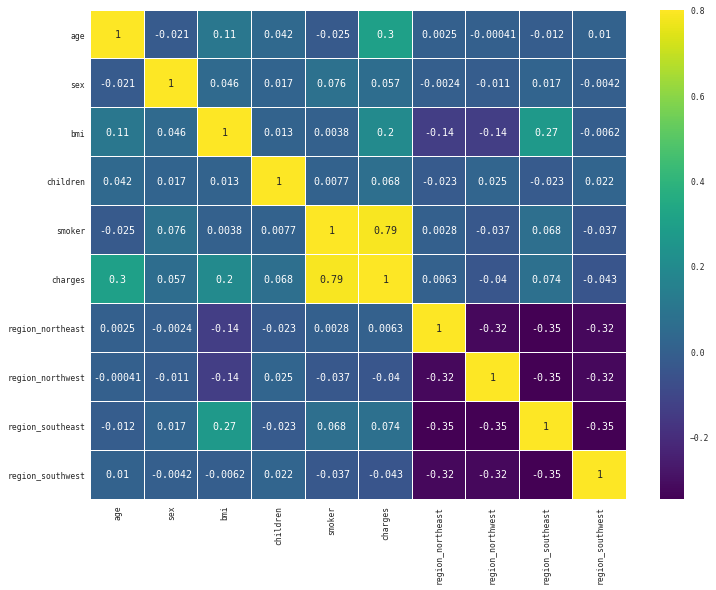

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [120]:
df = pd.read_csv("insurance.csv")
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df['sex'] = df['sex'].map({'male':1,'female':0})
df=pd.get_dummies(df)
#Heat Map to see the correlation between diffrent variables
#Find the correlation between the different varaibles in the datasets
cormat = df.corr()

#Set uo the matplolib figure
f, ax = plt.subplots(figsize=(12, 9))

#Draw the heatmap using seaborn
colormap = plt.cm.viridis
sns.heatmap(cormat, linewidths=0.1, cmap = colormap, 
            linecolor = 'White', vmax=0.8, annot=True)
plt.show()
df.head()

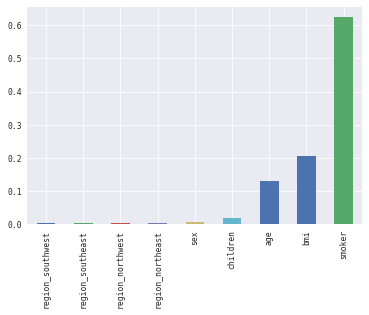

In [84]:
df = pd.read_csv("insurance.csv")
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df['sex'] = df['sex'].map({'male':1,'female':0})
df=pd.get_dummies(df)

X = df.drop('charges', axis = 1)
y = df['charges']

from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X,y)
feat_imp = clf.feature_importances_
feat_imp_series = pd.Series(feat_imp,X.columns)
feat_imp_series.sort_values().plot(kind='bar')

We can conclude that region is not needed and isn't particularly valuable for predicting charges, we'll re-read the df and encode our binary variables and drop 'region'

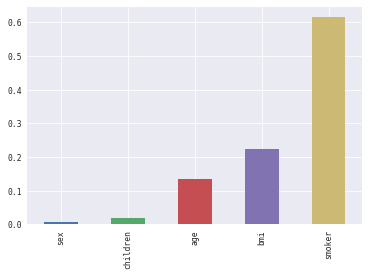

In [165]:
df = pd.read_csv("insurance.csv")
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df['sex'] = df['sex'].map({'male':1,'female':0})
df.drop('region',axis=1)

y = df['charges']
X = df.drop(['charges','region'], axis=1)



clf = RandomForestRegressor()
clf.fit(X,y)
feat_imp = clf.feature_importances_
feat_imp_series = pd.Series(feat_imp, X.columns)
feat_imp_series.sort_values().plot(kind='bar')

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [171]:
import statsmodels.api as sm
from scipy import stats

In [172]:
X_train2 = sm.add_constant(X_train)
linearModel = sm.OLS(y_train, X_train2)
linear = linearModel.fit()
print(linear.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     546.7
Date:                Wed, 11 Apr 2018   Prob (F-statistic):          1.11e-282
Time:                        20:41:42   Log-Likelihood:                -10178.
No. Observations:                1003   AIC:                         2.037e+04
Df Residuals:                     997   BIC:                         2.040e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.157e+04   1105.819    -10.463      0.0

# MCMC

In [102]:
beta0 = pm.Normal("beta0", 0, 0.0001)
noise = pm.Uniform("noise", 0, 500)

In [104]:
b = np.empty(5, dtype=object)
x = np.empty(5, dtype=object)

In [139]:
b1 = pm.Normal("b1", 0, 0.0001); b[1] = b1
b2 = pm.Normal("b2", 0, 0.0001); b[2] = b2
b3 = pm.Normal("b3", 0, 0.0001); b[3] = b3
b4 = pm.Normal("b4", 0, 0.0001); b[4] = b4

In [140]:
x1 = pm.Normal("x1", 0, 1, df['smoker'], observed=True)
x[1] = x1
x2 = pm.Normal("x2", 0, 1, df['bmi'], observed=True)
x[2] = x2
x3 = pm.Normal("x3", 0, 1, df['age'], observed=True)
x[3] = x3
x4 = pm.Normal("x4", 0, 1, df['children'], observed=True)
x[4] = x4

In [141]:
@pm.deterministic
def pred(beta0 = beta0, b = b, x = x):
    return beta0 + b[1]*x[2] + b[2]*x[2] + b[3]*x[3] + b[4]*x[4]

In [142]:
y = pm.Normal("y", pred, noise, value = np.array(df['charges']), observed = True)

model = pm.Model([beta0, pm.Container(b), noise, pm.Container(x), y, pred])

In [143]:
import pydot
import pymc.graph
from IPython.display import display_png

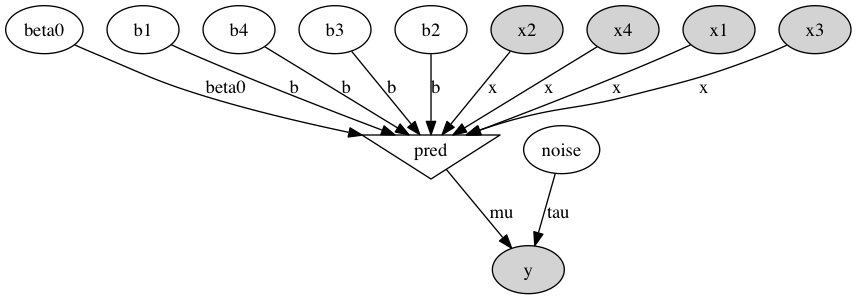

In [144]:
graph = pm.graph.graph(model)
display_png(graph.create_png(), raw = True)

In [129]:
mcmc = pm.MCMC(model)
mcmc.sample(100000, 200)

/anaconda3/lib/python3.6/site-packages/pymc/MCMC.py:81: UserWarning: Instantiating a Model object directly is deprecated. We recommend passing variables directly to the Model subclass.
  warnings.warn(message)


 [-----------------100%-----------------] 100000 of 100000 complete in 35.0 sec

In [ ]:
mcmc.trace()

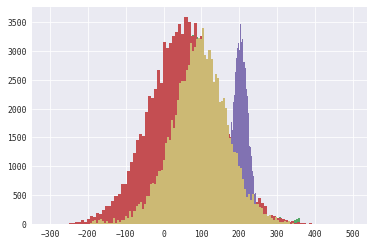

In [145]:
#multifig, multiax = plt.subplots(2, 1, figsize=(10, 10))
b0_val = np.mean(mcmc.trace('beta0')[:])
plt.hist(mcmc.trace('b1')[:], bins=100)

b1_val = np.mean(mcmc.trace('b1')[:])
plt.hist(mcmc.trace('b1')[:], bins=100)

b4_val = np.mean(mcmc.trace('b4')[:])
plt.hist(mcmc.trace('b4')[:], bins=100)

b3_val = np.mean(mcmc.trace('b3')[:])
plt.hist(mcmc.trace('b3')[:], bins=100)

b2_val = np.mean(mcmc.trace('b2')[:])
plt.hist(mcmc.trace('b2')[:], bins=100)

plt.show()

In [146]:
print("B0: " + str(np.mean(b0_val)))
print("B1: " + str(np.mean(b1_val)))
print("B2: " + str(np.mean(b2_val)))
print("B3: " + str(np.mean(b3_val)))
print("B4: " + str(np.mean(b4_val)))

B0: -19.22595498036644
B1: 82.42036535811884
B2: 94.25226439862746
B3: 203.62939597910554
B4: 57.901384825725195


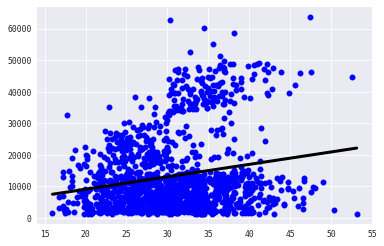

In [38]:
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_bmi, y)
prediction_space = np.linspace(min(X_bmi), max(X_bmi)).reshape(-1, 1)
plt.scatter(X_bmi, y, color = "blue")
plt.plot(prediction_space ,reg.predict(prediction_space), color = "black", 
         linewidth=3)
plt.show()

In [39]:
## BMI
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size = 0.3, 
                                                   random_state = 42)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.041903708799616586

In [40]:
## BMI + AGE
X_bmi_age = df[['bmi','age']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bmi_age, y, test_size = 0.3, 
                                                   random_state = 42)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.13135244833400728

In [41]:
## Bmi + Age + Children
X_bmi_age_child = df[['bmi', 'age', 'children']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bmi_age_child, y, test_size = 0.3, 
                                                   random_state = 42)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.13111524136803365

In [42]:
# Bmi + Age + Smoke
X_bmi_age_child = df[['bmi', 'age', 'smoker_no','smoker_yes']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bmi_age_child, y, test_size = 0.3, 
                                                   random_state = 42)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.7655078324224212

In [43]:
# All the features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.7696118054369012

In [23]:
def linear_regression(X, y, m_current=0, b_current=0, epochs=1000, learning_rate=0.0001):
    N = float(len(y))
    for i in range(epochs):
        y_current = (m_current * X) + b_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        m_gradient = -(2/N) * sum(X * (y - y_current))
        b_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        b_current = b_current - (learning_rate * b_gradient)
    return m_current, b_current, cost

In [24]:
linear_regression(X_bmi, y)

(array([2198.24593025]), array([2153.69076933]), array([2.2511194e+08]))